In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
df = pd.read_csv('MEOPAR_TREX_osker_20201028.csv',parse_dates=[3])
df

ID  Message ID                Device               Timestamp  \
0      4303258    62547534  1004 300434064046670 2020-09-10 10:30:55.001   
1      4303260    62547593  1004 300434064046670 2020-09-10 10:40:10.001   
2      4303288    62548168  1004 300434064046670 2020-09-10 10:50:09.001   
3      4303297    62549118  1004 300434064046670 2020-09-10 11:04:19.001   
4      4303300    62549598  1004 300434064046670 2020-09-10 11:10:47.001   
...        ...         ...                   ...                     ...   
19658  4520641    67641956  1009 300434064728070 2020-10-28 10:00:54.001   
19659  4520636    67641948  1007 300434064043660 2020-10-28 10:01:07.001   
19660  4520794    67646920  1007 300434064043660 2020-10-28 11:00:07.001   
19661  4520771    67646013   956 300434064324300 2020-10-28 11:00:10.001   
19662  4520772    67646020  1009 300434064728070 2020-10-28 11:00:36.001   

        Latitude  Longitude  Uptime (s)  SNR  Sat Count  Alarm  Bearing  \
0      48.622938 -68.701728           0   44          6  False        3   
1      48.621485 -68.701152          13   35          6  False      156   
2      48.624243 -68.703091          11   45          6  False      324   
3      48.623994 -68.703053          13   38          6  False       66   
4      48.624064 -68.702016          49   38          5  False       75   
...          ...        ...         ...  ...        ...    ...      ...   
19658  49.405779 -58.768800          56   35          5  False      141   
19659  49.434368 -58.708032          71   35          5  False      174   
19660  49.424064 -58.692602          11   34          5  False      147   
19661  49.121440 -58.581562          15   35          6  False      147   
19662  49.395507 -58.756934          40   43          6  False      105   

       Speed (km/h)  Speed (knots)  HDOP  
0              1.44          0.778   1.8  
1              1.80          0.972   1.8  
2              1.08          0.583   1.8  
3              2.16          1.166   2.2  
4              0.72          0.389   3.2  
...             ...            ...   ...  
19658          1.44          0.778   3.2  
19659          2.16          1.166   4.6  
19660          1.08          0.583   1.6  
19661          1.44          0.778   1.4  
19662          2.88          1.555   1.4  

[19663 rows x 14 columns]

Device
1001 300434064148020    AxesSubplot(0.125,0.125;0.775x0.755)
1002 300434064049950    AxesSubplot(0.125,0.125;0.775x0.755)
1003 300434064142020    AxesSubplot(0.125,0.125;0.775x0.755)
1004 300434064046670    AxesSubplot(0.125,0.125;0.775x0.755)
1005 300434064149010    AxesSubplot(0.125,0.125;0.775x0.755)
1006 300434064044960    AxesSubplot(0.125,0.125;0.775x0.755)
1007 300434064043660    AxesSubplot(0.125,0.125;0.775x0.755)
1008 300434064047660    AxesSubplot(0.125,0.125;0.775x0.755)
1009 300434064728070    AxesSubplot(0.125,0.125;0.775x0.755)
1010 300434064046920    AxesSubplot(0.125,0.125;0.775x0.755)
890 300434063390330     AxesSubplot(0.125,0.125;0.775x0.755)
948 300434064424470     AxesSubplot(0.125,0.125;0.775x0.755)
949 300434064329300     AxesSubplot(0.125,0.125;0.775x0.755)
950 300434064422480     AxesSubplot(0.125,0.125;0.775x0.755)
951 300434064325310     AxesSubplot(0.125,0.125;0.775x0.755)
952 300434064323300     AxesSubplot(0.125,0.125;0.775x0.755)
953 3004340644204

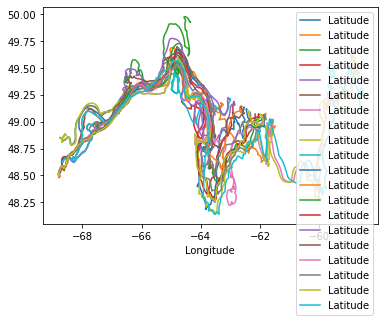

In [3]:
fig,ax=plt.subplots(1,1)
dg = df.groupby('Device')
dg.plot(x='Longitude', y='Latitude',ax=ax)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


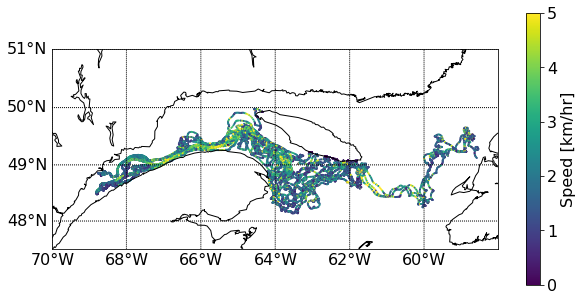

In [6]:
fontsize=16
fig,ax = plt.subplots(1,1,figsize=(10,5))
bmap = Basemap(llcrnrlon=-70, urcrnrlon=-58, llcrnrlat=47.5, urcrnrlat=51,projection='merc', resolution='i',ax=ax)
bmap.drawparallels(np.arange(48,52,1),labels=[True,False,False,False], fontsize=fontsize)
bmap.drawmeridians(np.arange(-70,-58,2),labels=[False,False,False,True], fontsize=fontsize)
for g in dg.groups:
    group = dg.get_group(g)
    x,y = bmap(group.Longitude.values, group.Latitude.values)
    mesh=bmap.scatter(x,y,c=group['Speed (km/h)'].values, vmin=0, vmax=5,s=1)
bmap.drawcoastlines()
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Speed [km/hr]', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize) 
fig.savefig('meopar-trex-oskers-map_20201028.png',bbox_inches='tight')

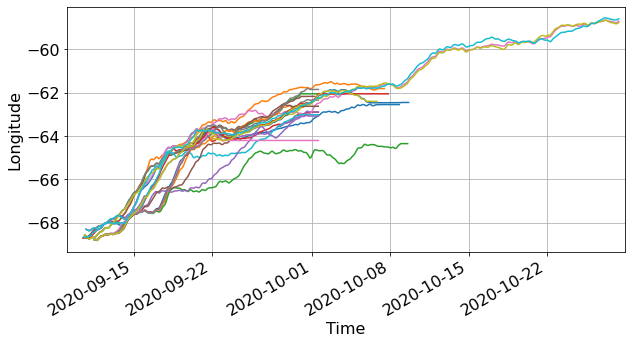

In [7]:
import datetime
fig,ax=plt.subplots(1,1,figsize=(10,5))
dg.plot(x='Timestamp', y='Longitude', ax=ax,legend=False)
ax.set_xlim([datetime.datetime(2020,9,9), datetime.datetime(2020,10,29)])
ax.grid()
ax.set_ylabel('Longitude', fontsize=fontsize)
ax.set_xlabel('Time', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=fontsize)
fig.savefig('meopar-trex-longitude_20201028.png', bbox_inches='tight')